# ✏️ Esercizi {#sec-ex-sem}

Nello studio di {cite:t}`weiss2018difficulties` viene esaminata la relazione tra la difficiltà di regolare le emozioni positive e l'abuso di alcol e di sostanze. Gli autori propongono due modelli SEM. Si riproduca l'analisi svolta da {cite:t}`weiss2018difficulties` usando `lavaan`.

In [14]:
source("../_common.R")

suppressPackageStartupMessages({
    library("lavaan")
    library("lavaanExtra")
    library("lavaanPlot")
    library("psych")
    library("dplyr") 
    library("tidyr")
    library("knitr")
    library("mvnormalTest")
    library("semPlot")
    library("DiagrammeRsvg")
    library("rsvg")
    library("effectsize")
})
set.seed(42)

Nello studio di {cite:t}`weiss2018difficulties` 

- La difficoltà di regolare le emozioni positive viene misurata con la  *Difficulties in Emotion Regulation Scale – Positive* (DERS-P; Weiss, Gratz, & Lavender, 2015), che comprende le sottoscale di Acceptance, Impulse, e Goals.
- L'abuso di sostanze viene misurato con la *Drug Abuse Screening Test* (DAST; Skinner, 1982).
- L'abuso di alcol viene misurato con la *Alcohol Use Disorder Identification Test* (AUDIT; Saunders, Aasland, Babor, De la Fuente, & Grant, 1993), con le sottoscale di Hazardous Consumption, Dependence, e Consequences. 

I dati di un campione di 284 partecipanti sono riportati nella forma di una matrice di correlazione.

In [2]:
lower <- "
   1
   .38 1
   .41 .64 1
   .34 .44 .30 1
   .29 .12 .27 .06 1
   .29 .22 .20 .17 .54 1
   .30 .15 .23 .09 .73 .69 1
"

In [3]:
dat_cov <- lavaan::getCov(
    lower,
    names = c("dmis", "con", "dep", "consu", "acc", "goal", "imp")
)
print(dat_cov)

      dmis  con  dep consu  acc goal  imp
dmis  1.00 0.38 0.41  0.34 0.29 0.29 0.30
con   0.38 1.00 0.64  0.44 0.12 0.22 0.15
dep   0.41 0.64 1.00  0.30 0.27 0.20 0.23
consu 0.34 0.44 0.30  1.00 0.06 0.17 0.09
acc   0.29 0.12 0.27  0.06 1.00 0.54 0.73
goal  0.29 0.22 0.20  0.17 0.54 1.00 0.69
imp   0.30 0.15 0.23  0.09 0.73 0.69 1.00


In questo studio, gli autori adottano due modelli SEM distinti per analizzare i dati. Nel primo modello, si postula che la difficoltà nella regolazione delle emozioni positive funzioni come variabile esogena, influenzando sia l'abuso di sostanze sia l'abuso di alcol. Inoltre, si ipotizza una correlazione tra abuso di sostanze e abuso di alcol, suggerendo una possibile interdipendenza tra questi due comportamenti problematici.

Per quanto riguarda le variabili latenti specifiche, la difficoltà di regolare le emozioni positive, indicata come `drpe`, è rappresentata da una variabile latente che si basa su tre indicatori.Parallelamente, l'abuso di alcol, etichettato come `amis`, è concepito come una seconda variabile latente, anch'essa identificata tramite tre indicatori distinti. 

In [4]:
mod <- "
  drpe =~ NA*acc + goal + imp
  amis =~ NA*con + dep + consu
  amis ~ drpe
  dmis ~ drpe
  dmis ~~ amis
  drpe ~~ 1*drpe
  amis ~~ 1*amis
"

Adattiamo il modello ai dati con `sem()`.

In [5]:
fit <- lavaan::sem(mod, sample.cov = dat_cov, sample.nobs = 284)

Esaminiamo i risultati.

In [6]:
standardizedSolution(fit) |> print()

     lhs op   rhs est.std    se      z pvalue ci.lower ci.upper
1   drpe =~   acc   0.770 0.031 24.982  0.000    0.710    0.830
2   drpe =~  goal   0.728 0.033 21.849  0.000    0.663    0.794
3   drpe =~   imp   0.945 0.024 39.322  0.000    0.898    0.992
4   amis =~   con   0.837 0.039 21.217  0.000    0.759    0.914
5   amis =~   dep   0.756 0.041 18.420  0.000    0.676    0.837
6   amis =~ consu   0.494 0.052  9.439  0.000    0.392    0.597
7   amis  ~  drpe   0.254 0.066  3.863  0.000    0.125    0.383
8   dmis  ~  drpe   0.334 0.056  6.001  0.000    0.225    0.443
9   amis ~~  dmis   0.458 0.055  8.303  0.000    0.350    0.567
10  drpe ~~  drpe   1.000 0.000     NA     NA    1.000    1.000
11  amis ~~  amis   0.936 0.033 28.023  0.000    0.870    1.001
12   acc ~~   acc   0.407 0.047  8.575  0.000    0.314    0.500
13  goal ~~  goal   0.470 0.049  9.677  0.000    0.375    0.565
14   imp ~~   imp   0.107 0.045  2.349  0.019    0.018    0.196
15   con ~~   con   0.300 0.066  4.551  

Creiamo un path diagram.

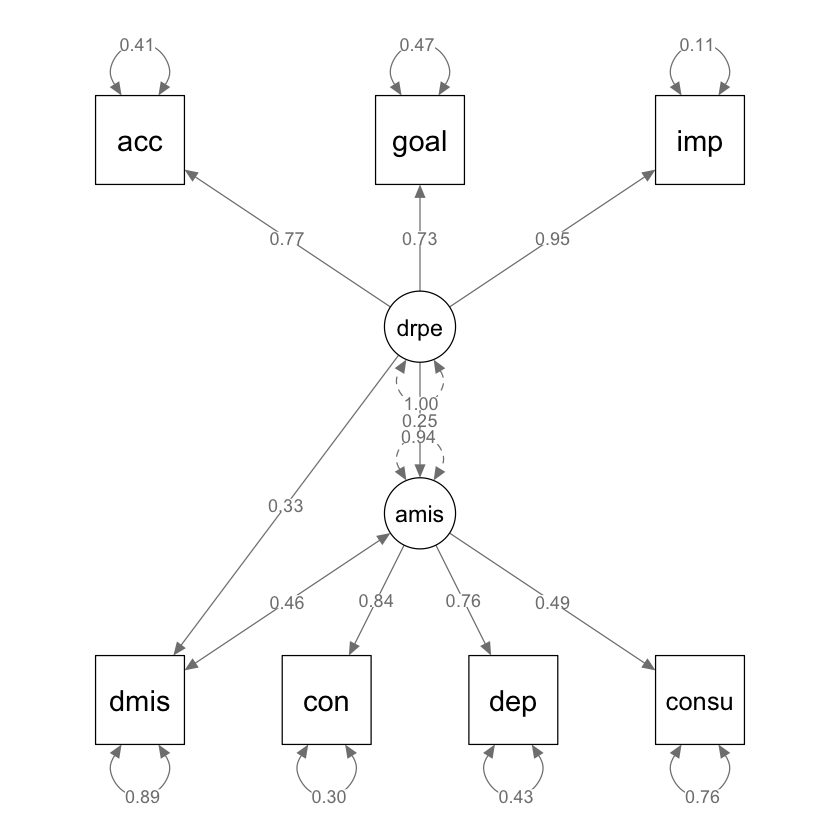

In [15]:
semPaths(fit,
    whatLabels = "std",
    sizeMan = 10,
    edge.label.cex = 0.9,
    style = "ram",
    nCharNodes = 0, nCharEdges = 0
)

Gli autori esplorano un modello alternativo nel quale le relazioni causali vengono rovesciate: in questo caso è la difficoltà di regolazione delle emozioni positive ad essere la variabile esogena, e l'abuso di sostanze e l'abuso di alcol sono le variabili esogene.

In [9]:
mod_alt <- "
  drpe =~ NA*acc + goal + imp
  amis =~ NA*con + dep + consu
  drpe ~ amis + dmis
  dmis ~~ amis
  drpe ~~ 1*drpe
  amis ~~ 1*amis
"

In [10]:
fit_alt <- sem(mod_alt, sample.cov = dat_cov, sample.nobs = 311)

In [11]:
standardizedSolution(fit_alt) |> print()

     lhs op   rhs est.std    se      z pvalue ci.lower ci.upper
1   drpe =~   acc   0.770 0.029 26.143  0.000    0.712    0.828
2   drpe =~  goal   0.728 0.032 22.864  0.000    0.666    0.791
3   drpe =~   imp   0.945 0.023 41.149  0.000    0.900    0.990
4   amis =~   con   0.837 0.038 22.203  0.000    0.763    0.910
5   amis =~   dep   0.756 0.039 19.276  0.000    0.679    0.833
6   amis =~ consu   0.494 0.050  9.877  0.000    0.396    0.592
7   drpe  ~  amis   0.115 0.075  1.549  0.121   -0.031    0.261
8   drpe  ~  dmis   0.276 0.066  4.189  0.000    0.147    0.405
9   amis ~~  dmis   0.503 0.050 10.122  0.000    0.405    0.600
10  drpe ~~  drpe   0.879 0.037 23.633  0.000    0.806    0.952
11  amis ~~  amis   1.000 0.000     NA     NA    1.000    1.000
12   acc ~~   acc   0.407 0.045  8.973  0.000    0.318    0.496
13  goal ~~  goal   0.470 0.046 10.126  0.000    0.379    0.561
14   imp ~~   imp   0.107 0.043  2.458  0.014    0.022    0.192
15   con ~~   con   0.300 0.063  4.763  

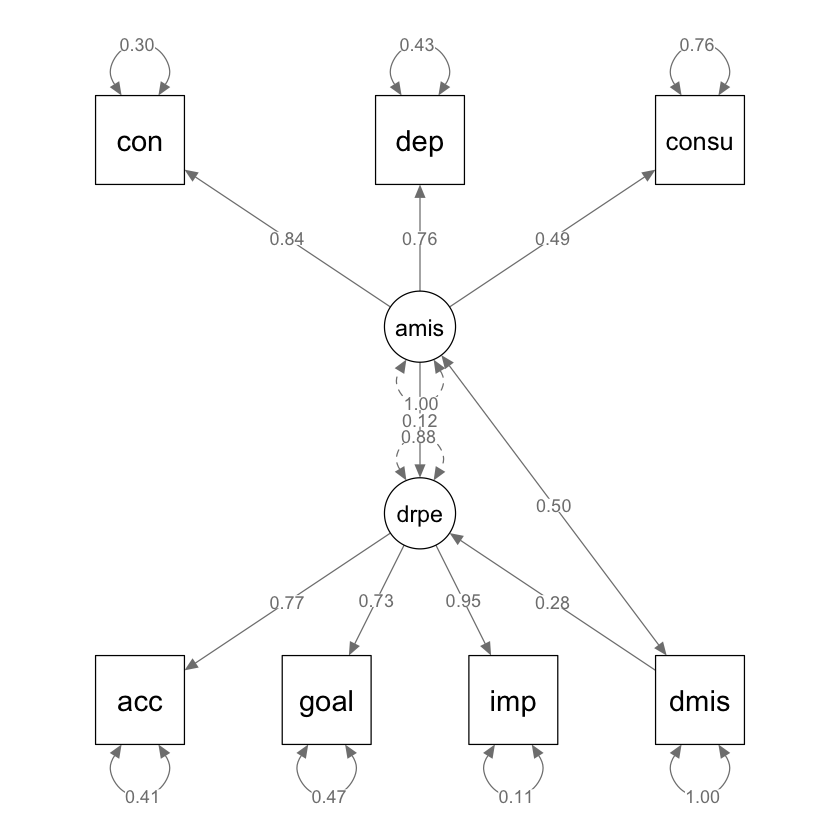

In [16]:
semPaths(fit_alt,
    whatLabels = "std",
    sizeMan = 10,
    edge.label.cex = 0.9,
    style = "ram",
    nCharNodes = 0, nCharEdges = 0
)

Vedremo in seguito come sia possibile eseguire un test statistico per stabilire quale di due modelli sia più appropriato. Anticipando qui tale discussione, applichiamo il test del rapporto di verosimiglianze.

In [13]:
lavTestLRT(fit, fit_alt) |> print()

Warning message in lavTestLRT(fit, fit_alt):
"lavaan WARNING: some models have the same degrees of freedom"



Chi-Squared Difference Test

        Df    AIC    BIC  Chisq Chisq diff RMSEA Df diff Pr(>Chisq)
fit     12 4963.6 5022.0 38.211                                    
fit_alt 12 5433.1 5492.9 41.844     3.6327     0       0           


I risultati di questo test suggeriscono che il primo modello è maggiormente appropriato per descrivere i dati raccolti da {cite:t}`weiss2018difficulties`.